In [40]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Load and understand data

In [14]:
relative_path = "/Users/minhcao/Desktop/summer2024_project/Credit_Risk/data/default_of_credit_card_clients.xls"
risk = pd.read_excel(relative_path, header=1)

In [15]:
risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
# Drop the index column
risk = risk.drop(columns=["ID"]) 

In [34]:
risk = risk.rename({"default payment next month": "default"}, axis = "columns")

In [35]:
#get all the features
risk.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [28]:
# check the shape of the data
risk.shape

(30000, 24)

- We have 30000 records with 23 features, 1 response

In [36]:
#check for basic statistic of data
risk.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- PAY_0 maximum value is 8, this mean that some people miss 8 months of credit payment
- Maximum payment amount in PAY_AMT1 is 873552.00 NT dolar ~ USD $24,000

In [39]:
# Determin number of default cases and plot

on_time = risk[risk["default"] == 0]
default = risk[risk["default"] == 1]

print(f"Total Default Count: {len(default)} ")
print(f"On time payment count: {len(on_time)}")
print(f"Fraction of default and all the cases: {len(default)/ len(risk)}")

Total Default Count: 6636 
On time payment count: 23364
Fraction of default and all the cases: 0.2212


Text(0.5, 0, 'Default (0: Non-default, 1: Default)')

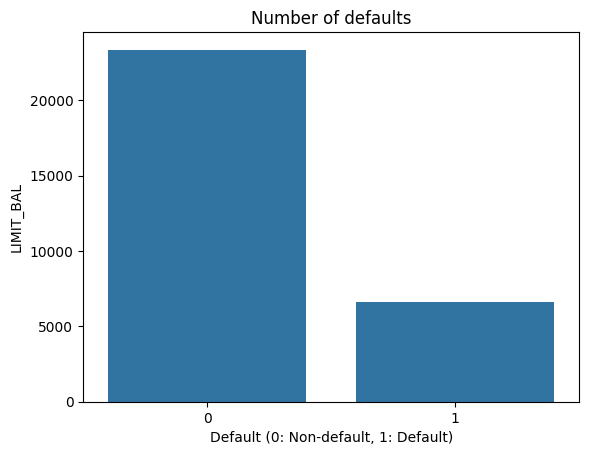

In [49]:
tmp = risk.groupby("default")["LIMIT_BAL"].count()

#Conver series to df and reset index to make default a column
default_count = pd.DataFrame(tmp).reset_index()

sns.barplot(data=default_count, x = "default", y = "LIMIT_BAL")
plt.title("Number of defaults")
plt.xlabel("Default (0: Non-default, 1: Default)")


- The data is somewhat imbalance

In [70]:
# ## Investigate payment type 8, high risk customer

# tmp = risk[risk["PAY_0"] == 8].sample(n = 6)

# columns = ['PAY_0', 'PAY_2', 
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "default"]

# tmp[columns]

- Most of them will default

In [69]:
# ## Investigate payment type -2, low risk customer
# tmp = risk[risk["PAY_0"] < 0].sample(n = 15)

# columns = ['PAY_0', 'PAY_2', 
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "default"]

# tmp[columns]

## Correlation Matrix

We will check if there are high correlation between some features